# STAT207 Final Project - Video Game Analysis


Aron Rista, Benjamin Leidig, Devon Reynolds, Jon Han

In [ ]:
#Imports here
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_score, KFold

from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, LogisticRegression

from sklearn.cluster import KMeans

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import r2_score, confusion_matrix, roc_curve, auc, roc_auc_score, silhouette_score

import warnings
from sklearn.exceptions import ConvergenceWarning

# Ignore scikit-learn ConvergenceWarnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", category=UserWarning)
from sklearn.preprocessing import StandardScaler
scaler_training = StandardScaler()
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf

## 1. Introduction


Our primary research goal of the analysis is to build a predictive model that will perform the best when predicting whether or not a video game has high sales (1 million or more) in new datasets. Ideally, we would like for our chosen model to also yield reliable interpretative insights about the nature of the relationship between the variables in the dataset. We also aim to thoroughly describe the nature of the variables as well as the relationship between the variables used in our model. The explanatory variables we have selected to help us effectively predict if a video game has high sales for new datasets are the publisher, review score, main story length, extras length, and completionists length. Ideally, we would like for our chosen model to also yield reliable interpretative insights about the nature of the relationship between the variables in the dataset as the secondary research goal. The motivation for why someone might want to build a predictive model that predicts if a video game has high sales for new datasets is to possibly determine the profitability of new video games before they release. A video game with higher sales likely is more popular, attracts more customers, and brings in more revenue (Clement, J. (n.d.). Topic: Video game industry. Statista. https://www.statista.com/topics/868/video-games/#topicOverview). If the details of the video game are released before the video game is released, our model will be able to predict if the video game has high sales or not. Someone that may find this predictive model useful is an investor. This is useful for an investor because they may choose to invest money in a company if the model predicts that their new release video game will have high sales and be profitable. If the model predicts that their new release video game will have low sales, that person may not choose to invest in that company and look elsewhere instead. Investment research is an important step that is taken before investors put their money into certain companies, and data and models are a tool that is used to come to a decision, (The Comprehensive Guide to Investment Research. Corporate Finance Institute. (2024, January 9). https://corporatefinanceinstitute.com/resources/capital_markets/comprehensive-guide-to-investment-research/). An investor would desire a classifier that’s equally as accurate at classifying the “positives”, which is all of the video games that are predicted to have high sales, and classifying the “negatives”, which is all of the video games that are predicted to have low sales. The reason why an investor would want a classifier that is equally as accurate for both is because they want to make the right decisions and investments with their money. An investor wants to only invest their money into video games that are predicted to have high sales and also does not want to waste or lose their money by investing it into video games that are predicted to have low sales.

## 2. Dataset Discussion

We got this dataset from Dr. Ellison, who originally got it from https://corgis-edu.github.io/corgis/csv/video_games/. We downloaded this csv file on 4/17/2024, however, Dr. Ellison downloaded this csv file on 9/8/2023 to provide students with a pre-selected dataset option. Each row represents an individual video game title along with its corresponding data. The source of the dataset tells us that the playtime information was collected from crowd-sourced data on "How Long to Beat". The source of the dataset does not specify how the rest of this dataset was collected, however it is likely that the data was collected using information found online. This dataset examines video games that were released between 2004 and 2010.




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('https://corgis-edu.github.io/corgis/datasets/csv/video_games/video_games.csv')

In [ ]:
df['high_sales'] = 1 * (df['Metrics.Sales'] >= 1)

In [ ]:
df.head()

,Title,Features.Handheld?,Features.Max Players,Features.Multiplatform?,Features.Online?,Metadata.Genres,Metadata.Licensed?,Metadata.Publishers,Metadata.Sequel?,Metrics.Review Score,...,Length.Main + Extras.Leisure,Length.Main + Extras.Median,Length.Main + Extras.Polled,Length.Main + Extras.Rushed,Length.Main Story.Average,Length.Main Story.Leisure,Length.Main Story.Median,Length.Main Story.Polled,Length.Main Story.Rushed,high_sales
0,Super Mario 64 DS,True,1,True,True,Action,True,Nintendo,True,85,...,29.966667,25.000000,16,18.333333,14.333333,18.316667,14.500000,21,9.700000,1
1,Lumines: Puzzle Fusion,True,1,True,True,Strategy,True,Ubisoft,True,89,...,9.866667,9.750000,2,9.616667,10.333333,11.083333,10.000000,3,9.583333,0
2,WarioWare Touched!,True,2,True,True,"Action,Racing / Driving,Sports",True,Nintendo,True,81,...,5.666667,3.333333,11,2.783333,1.916667,2.933333,1.833333,30,1.433333,0
3,Hot Shots Golf: Open Tee,True,1,True,True,Sports,True,Sony,True,81,...,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0,0.000000,0
4,Spider-Man 2,True,1,True,True,Action,True,Activision,True,61,...,17.316667,12.500000,12,10.483333,8.350000,11.083333,8.000000,23,5.333333,0


In [ ]:
 df.shape[0]

1212

There are 1212 rows in our dataframe before any data cleaning.

## 3. Dataset Cleaning

In [ ]:
df_clean = df[(df['Metadata.Publishers'] == 'EA') | (df['Metadata.Publishers'] == 'Ubisoft') | (df['Metadata.Publishers'] == 'Activision') | (df['Metadata.Publishers'] == 'Nintendo') | (df['Metadata.Publishers'] == 'Sega')]

In [ ]:
print('Rows dropped: ', df.shape[0] - df_clean.shape[0])

Rows dropped:  708


In [ ]:
df_clean = df_clean[['high_sales',
         'Metadata.Publishers',
         'Metrics.Review Score',
         'Length.Main Story.Average',
         'Length.Main + Extras.Average',
         'Length.Completionists.Average'
         ]]

df_clean.rename(columns = {'Metadata.Publishers':'publisher',
                     'Metrics.Review Score': 'review_score',
                     'Length.Main Story.Average': 'main_story_length',
                     'Length.Main + Extras.Average': 'extras_length',
                     'Length.Completionists.Average': 'completionists_length',
                    },
          inplace = True
          )

<ipython-input-71-019d0d54c4fc>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.rename(columns = {'Metadata.Publishers':'publisher',


In [ ]:
df_clean.dtypes

high_sales                 int64
publisher                 object
review_score               int64
main_story_length        float64
extras_length            float64
completionists_length    float64
dtype: object

In [ ]:
df_clean.isna().sum()

high_sales               0
publisher                0
review_score             0
main_story_length        0
extras_length            0
completionists_length    0
dtype: int64

There are no implicit missing values because the datatypes for every column match up to what they should be.

We choose to maintain and preserve the rest of the dataset instead of further cleaning it. There is a possibility that some video games are outliers in the dataset, skewing our data to 'less typical' observations. However, the reason that we choose to keep all of the rows is because we want the dataset to be as representative with as many video games as possible. Keeping the outliers also potentially makes our dataset representative of a wider range of observations. We did, however, drop 708 rows to use video games published by only the top 5 most popular publishers in the dataset.

## 4. Preliminary Analysis

<Axes: xlabel='high_sales'>

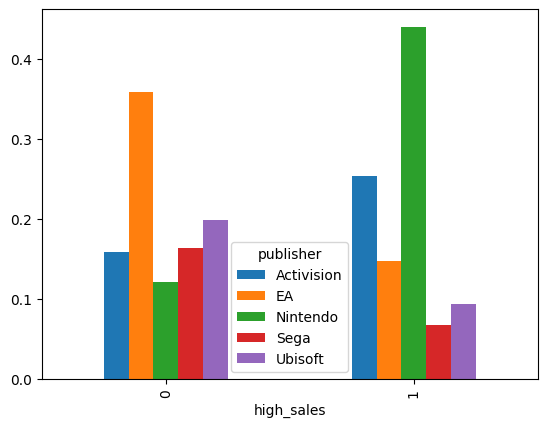

In [ ]:
catplot = pd.crosstab(df_clean['high_sales'] , df_clean['publisher'], normalize = 'index')
catplot.plot.bar()

There is a significant relationship between `publisher` and `high_sales` because the differences of between box heights changes for different values of `high_sales`.

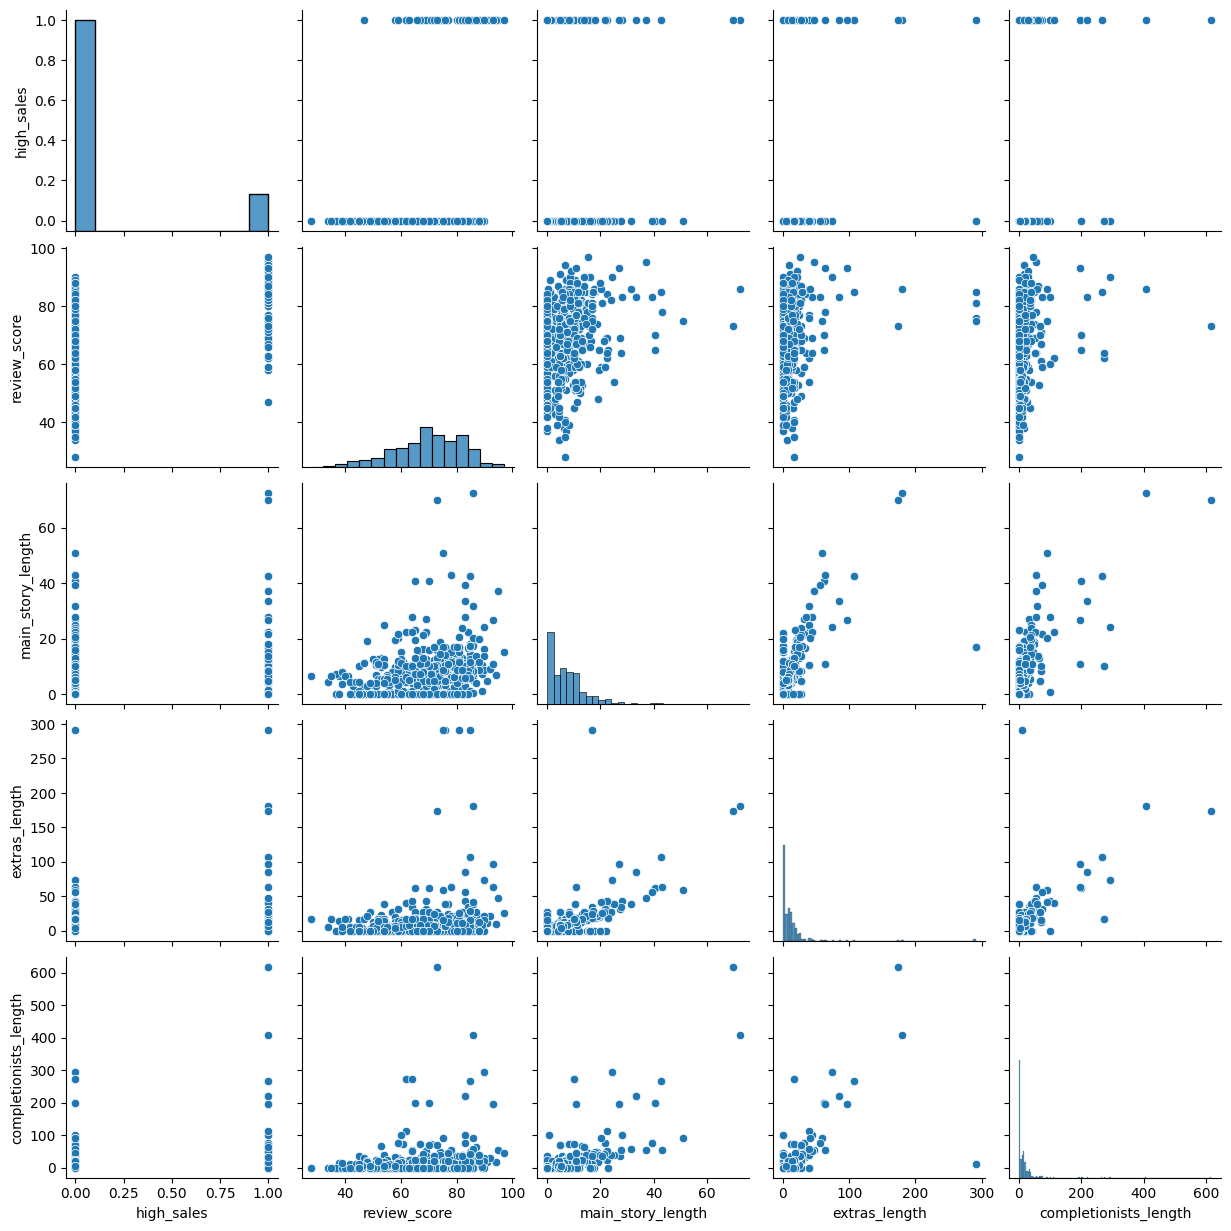

In [ ]:
sns.pairplot(data = df_clean)

In [ ]:
df_clean[['high_sales', 'review_score', 'main_story_length', 'extras_length', 'completionists_length']].corr()

,high_sales,review_score,main_story_length,extras_length,completionists_length
high_sales,1.000000,0.310895,0.224361,0.203533,0.261878
review_score,0.310895,1.000000,0.253229,0.196390,0.170776
main_story_length,0.224361,0.253229,1.000000,0.546984,0.687275
extras_length,0.203533,0.196390,0.546984,1.000000,0.466953
completionists_length,0.261878,0.170776,0.687275,0.466953,1.000000


We visualized the relationship between all of the numerical explanatory variables within the dataset. None of our numerical explanatory variables have correlation coefficients >0.7 with each other, however, there appears to be a few pairs of explanatory variable pairs with minor associations such as `extras_length` and `main_story_length`(0.55) as well as `main_story_length` and `completionist_length` (0.69). None of our numerical explanatory variables appear to have a strong correlation with our response variable, and only one variable, `review_score`, has a correlation coefficient above 0.3 with the response variable (0.31).

<Axes: xlabel='publisher', ylabel='review_score'>

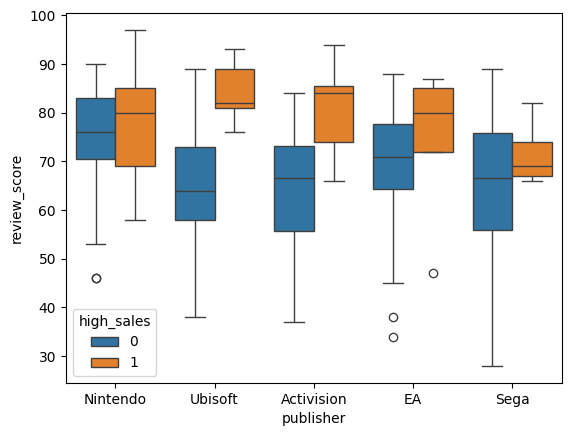

In [ ]:
sns.boxplot(x = 'publisher',
            y = 'review_score',
            hue = 'high_sales',
            data = df_clean
            )

For different values of `publisher`, the relationship between `review_score` and `high_sales` changes. This is evident due to how differences in the IQRs and median values of `review_score` and `high_sales` change for different values of `publisher`.

<Axes: xlabel='publisher', ylabel='main_story_length'>

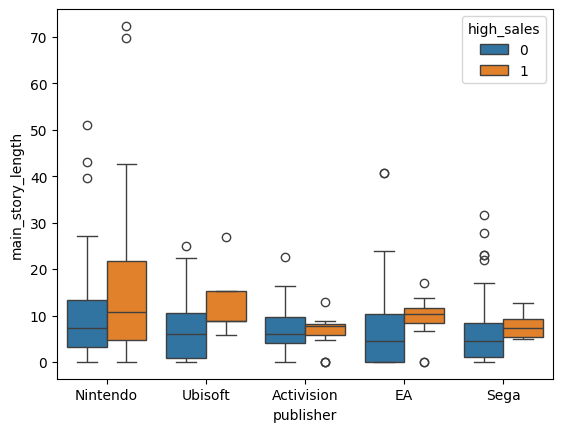

In [ ]:
sns.boxplot(x = 'publisher',
            y = 'main_story_length',
            hue = 'high_sales',
            data = df_clean
            )

For different values of `publisher`, the relationship between `main_story_length` and `high_sales` changes. This is evident due to how differences in the IQRs and median values of `main_story_length` and `high_sales` change for different values of `publisher`.

<Axes: xlabel='publisher', ylabel='extras_length'>

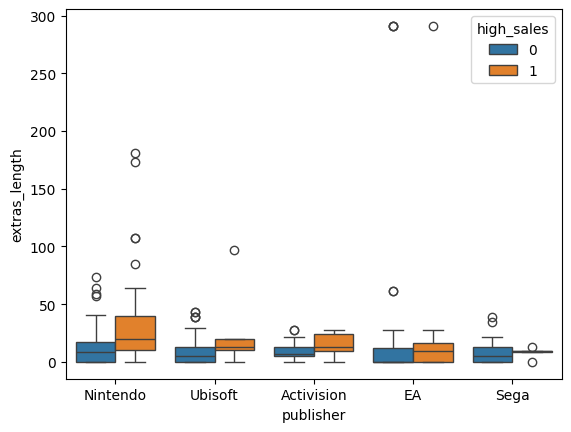

In [ ]:
sns.boxplot(x = 'publisher',
            y = 'extras_length',
            hue = 'high_sales',
            data = df_clean
            )

For different values of `publisher`, the relationship between `extras_length` and `high_sales` changes. This is evident due to how differences in the IQRs and median values of `extras_length` and `high_sales` change slightly for different values of `publisher`.

<Axes: xlabel='publisher', ylabel='completionists_length'>

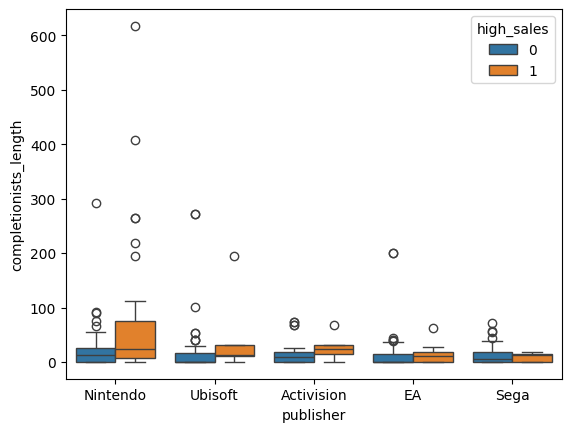

In [ ]:
sns.boxplot(x = 'publisher',
            y = 'completionists_length',
            hue = 'high_sales',
            data = df_clean
            )

For different values of `publisher`, the relationship between `completionists_length` and `high_sales` changes. This is evident due to how differences in the IQRs and median values of `completionists_length` and `high_sales` change slightly for different values of `publisher`.

## 5. Model Data Preprocessing

Our dataframe already classifies high_sales true or false as 1 and 0 so there is no need to create a seperate 0/1 response variable.

In [ ]:
features_matrix = df_clean.drop(['high_sales'], axis = 1)
features_matrix.head()

,publisher,review_score,main_story_length,extras_length,completionists_length
0,Nintendo,85,14.333333,24.916667,29.766667
1,Ubisoft,89,10.333333,9.750000,0.000000
2,Nintendo,81,1.916667,3.850000,10.000000
4,Activision,61,8.350000,12.766667,72.566667
5,EA,67,15.500000,20.833333,30.033333


In [ ]:
target_array = df_clean['high_sales']
target_array.head()

0    1
1    0
2    0
4    0
5    0
Name: high_sales, dtype: int64

We created features matrices and target arrays.

In [ ]:
indicator_variables = pd.get_dummies(features_matrix[['publisher']], drop_first=True, dtype=int)

In [ ]:
features_matrix = pd.concat([features_matrix, indicator_variables], axis=1).drop(columns = 'publisher')

In [ ]:
features_matrix

,review_score,main_story_length,extras_length,completionists_length,publisher_EA,publisher_Nintendo,publisher_Sega,publisher_Ubisoft
0,85,14.333333,24.916667,29.766667,0,1,0,0
1,89,10.333333,9.750000,0.000000,0,0,0,1
2,81,1.916667,3.850000,10.000000,0,1,0,0
4,61,8.350000,12.766667,72.566667,0,0,0,0
5,67,15.500000,20.833333,30.033333,1,0,0,0
...,...,...,...,...,...,...,...,...
1180,75,0.000000,15.000000,0.000000,1,0,0,0
1185,62,10.250000,17.266667,272.500000,0,0,0,1
1189,64,10.250000,17.266667,272.500000,0,0,0,1
1199,68,0.000000,0.000000,0.000000,1,0,0,0


Then, we create indicator variables for our one categorical explanatory variable.

In [ ]:
scaler_training = StandardScaler()

In [ ]:
scaled_expl_vars = scaler_training.fit_transform(features_matrix[['review_score', 'main_story_length', 'extras_length', 'completionists_length']])

In [ ]:
features_matrix[['review_score', 'main_story_length', 'extras_length', 'completionists_length']] = scaled_expl_vars

In [ ]:
features_matrix

,review_score,main_story_length,extras_length,completionists_length,publisher_EA,publisher_Nintendo,publisher_Sega,publisher_Ubisoft
0,1.261228,0.761720,0.397438,0.232826,0,1,0,0
1,1.584102,0.301184,-0.102278,-0.382521,0,0,0,1
2,0.938354,-0.667861,-0.296673,-0.175798,0,1,0,0
4,-0.676018,0.072834,-0.002884,1.117603,0,0,0,0
5,-0.191707,0.896043,0.262899,0.238338,1,0,0,0
...,...,...,...,...,...,...,...,...
1180,0.454042,-0.888535,0.070701,-0.382521,1,0,0,0
1185,-0.595300,0.291589,0.145383,5.250696,0,0,0,1
1189,-0.433862,0.291589,0.145383,5.250696,0,0,0,1
1199,-0.110988,-0.888535,-0.423524,-0.382521,1,0,0,0


We scaled the numerical explanatory variables in our dataset.

## 6. Feature Selection with k-Fold Cross-Validation

Now, we will use a backwards selection algorithm to find a model with a close-to-the-best AUC.

In [ ]:
log_mod = LogisticRegression()

In [ ]:
cross_val = KFold(n_splits = 5, shuffle = True, random_state = 100)
cross_val

KFold(n_splits=5, random_state=100, shuffle=True)

In [ ]:
test_fold_r2 = cross_val_score(log_mod, features_matrix, target_array, cv = cross_val, scoring = 'roc_auc')
print('Mean Test Fold AUC:', test_fold_r2.mean())

Mean Test Fold AUC: 0.8100233779340353


In [ ]:
review_score_features_matrix = features_matrix[['main_story_length', 'extras_length', 'completionists_length',	'publisher_EA',	'publisher_Nintendo',	'publisher_Sega',	'publisher_Ubisoft']]
test_fold_r2 = cross_val_score(log_mod, review_score_features_matrix, target_array, cv = cross_val, scoring = 'roc_auc')
print('Mean Test Fold AUC:', test_fold_r2.mean())

Mean Test Fold AUC: 0.7504135719658434


In [ ]:
main_story_length_features_matrix = features_matrix[['review_score', 'extras_length', 'completionists_length',	'publisher_EA',	'publisher_Nintendo',	'publisher_Sega',	'publisher_Ubisoft']]
test_fold_r2 = cross_val_score(log_mod, main_story_length_features_matrix, target_array, cv = cross_val, scoring = 'roc_auc')
print('Mean Test Fold AUC:', test_fold_r2.mean())

Mean Test Fold AUC: 0.8101240562938296


In [ ]:
extras_length_features_matrix = features_matrix[['review_score', 'main_story_length', 'completionists_length',	'publisher_EA',	'publisher_Nintendo',	'publisher_Sega',	'publisher_Ubisoft']]
test_fold_r2 = cross_val_score(log_mod, extras_length_features_matrix, target_array, cv = cross_val, scoring = 'roc_auc')
print('Mean Test Fold AUC:', test_fold_r2.mean())

Mean Test Fold AUC: 0.8087520364400289


In [ ]:
completionists_length_features_matrix = features_matrix[['review_score', 'main_story_length', 'extras_length',	'publisher_EA',	'publisher_Nintendo',	'publisher_Sega',	'publisher_Ubisoft']]
test_fold_r2 = cross_val_score(log_mod, completionists_length_features_matrix, target_array, cv = cross_val, scoring = 'roc_auc')
print('Mean Test Fold AUC:', test_fold_r2.mean())

Mean Test Fold AUC: 0.8116423028067518


In [ ]:
publisher_features_matrix = features_matrix[['review_score', 'main_story_length', 'extras_length',	'completionists_length']]
test_fold_r2 = cross_val_score(log_mod, publisher_features_matrix, target_array, cv = cross_val, scoring = 'roc_auc')
print('Mean Test Fold AUC:', test_fold_r2.mean())

Mean Test Fold AUC: 0.7579144968067125


The best model in this round is the one including all explanatory variables besides `completionists_length`.

-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
review_score_completionists_length_features_matrix = features_matrix[['main_story_length', 'extras_length',	'publisher_EA',	'publisher_Nintendo',	'publisher_Sega',	'publisher_Ubisoft']]
test_fold_r2 = cross_val_score(log_mod, review_score_completionists_length_features_matrix, target_array, cv = cross_val, scoring = 'roc_auc')
print('Mean Test Fold AUC:', test_fold_r2.mean())

Mean Test Fold AUC: 0.7518440396152337


In [ ]:
main_story_length_completionists_length_features_matrix = features_matrix[['review_score', 'extras_length',	'publisher_EA',	'publisher_Nintendo',	'publisher_Sega',	'publisher_Ubisoft']]
test_fold_r2 = cross_val_score(log_mod, main_story_length_completionists_length_features_matrix, target_array, cv = cross_val, scoring = 'roc_auc')
print('Mean Test Fold AUC:', test_fold_r2.mean())

Mean Test Fold AUC: 0.8135670871344296


In [ ]:
extras_length_completionists_length_features_matrix = features_matrix[['review_score', 'main_story_length',	'publisher_EA',	'publisher_Nintendo',	'publisher_Sega',	'publisher_Ubisoft']]
test_fold_r2 = cross_val_score(log_mod, extras_length_completionists_length_features_matrix, target_array, cv = cross_val, scoring = 'roc_auc')
print('Mean Test Fold AUC:', test_fold_r2.mean())

Mean Test Fold AUC: 0.8108053785629721


In [ ]:
publisher_completionists_length_features_matrix = features_matrix[['review_score', 'main_story_length',	'extras_length']]
test_fold_r2 = cross_val_score(log_mod, publisher_completionists_length_features_matrix, target_array, cv = cross_val, scoring = 'roc_auc')
print('Mean Test Fold AUC:', test_fold_r2.mean())

Mean Test Fold AUC: 0.7567720275132097


The best model in this round is the one including all explanatory variables besides `completionists_length` and `main_story_length`.

-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
review_score_main_story_length_completionists_length_features_matrix = features_matrix[['extras_length',	'publisher_EA',	'publisher_Nintendo',	'publisher_Sega',	'publisher_Ubisoft']]
test_fold_r2 = cross_val_score(log_mod, review_score_main_story_length_completionists_length_features_matrix, target_array, cv = cross_val, scoring = 'roc_auc')
print('Mean Test Fold AUC:', test_fold_r2.mean())

Mean Test Fold AUC: 0.7462432965467758


In [ ]:
extras_length_main_story_length_completionists_length_features_matrix = features_matrix[['review_score',	'publisher_EA',	'publisher_Nintendo',	'publisher_Sega',	'publisher_Ubisoft']]
test_fold_r2 = cross_val_score(log_mod, extras_length_main_story_length_completionists_length_features_matrix, target_array, cv = cross_val, scoring = 'roc_auc')
print('Mean Test Fold AUC:', test_fold_r2.mean())

Mean Test Fold AUC: 0.807014578226814


In [ ]:
publisher_main_story_length_completionists_length_features_matrix = features_matrix[['review_score',	'extras_length']]
test_fold_r2 = cross_val_score(log_mod, publisher_main_story_length_completionists_length_features_matrix, target_array, cv = cross_val, scoring = 'roc_auc')
print('Mean Test Fold AUC:', test_fold_r2.mean())

Mean Test Fold AUC: 0.7609508508863626


The best model according to a backwards selection algorithm is the one including all explanatory variables besides `completionists_length` and `main_story_length`.

## 7. Best Model Discussion

In [ ]:
indicator_variables = pd.get_dummies(df_clean[['publisher']], drop_first=True, dtype=int)
df_clean = pd.concat([df_clean, indicator_variables], axis=1).drop(columns = 'publisher')
df_clean[['review_score', 'main_story_length', 'extras_length', 'completionists_length']] = scaled_expl_vars

In [ ]:
df_train, df_test = train_test_split(df_clean, test_size = 0.2, random_state = 100)
print(df_train.shape[0] / df_clean.shape[0])
print(df_test.shape[0] / df_clean.shape[0])

0.7996031746031746
0.2003968253968254


In [ ]:
df_train[['high_sales', 'review_score', 'extras_length', 'publisher_EA','publisher_Nintendo', 'publisher_Sega', 'publisher_Ubisoft']].corr()

,high_sales,review_score,extras_length,publisher_EA,publisher_Nintendo,publisher_Sega,publisher_Ubisoft
high_sales,1.000000,0.324127,0.213808,-0.142279,0.308011,-0.113666,-0.104925
review_score,0.324127,1.000000,0.205946,0.050432,0.239995,-0.133239,-0.120776
extras_length,0.213808,0.205946,1.000000,-0.003068,0.135405,-0.055510,-0.046187
publisher_EA,-0.142279,0.050432,-0.003068,1.000000,-0.310600,-0.281951,-0.341099
publisher_Nintendo,0.308011,0.239995,0.135405,-0.310600,1.000000,-0.177781,-0.215077
publisher_Sega,-0.113666,-0.133239,-0.055510,-0.281951,-0.177781,1.000000,-0.195239
publisher_Ubisoft,-0.104925,-0.120776,-0.046187,-0.341099,-0.215077,-0.195239,1.000000


Since none of our explanatory variables have a correlation coefficient with each other of 0.7 or greater, our model doesn't have an issue with multicollinearity.

In [ ]:
log_mod = smf.logit(formula = 'high_sales~review_score+extras_length+publisher_EA+publisher_Nintendo+publisher_Sega+publisher_Ubisoft',
                    data = df_train
                    ).fit()

Optimization terminated successfully.
         Current function value: 0.330911
         Iterations 7


In [ ]:
log_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             high_sales   No. Observations:                  403
Model:                          Logit   Df Residuals:                      396
Method:                           MLE   Df Model:                            6
Date:                Tue, 30 Apr 2024   Pseudo R-squ.:                  0.2367
Time:                        18:31:17   Log-Likelihood:                -133.36
converged:                       True   LL-Null:                       -174.71
Covariance Type:            nonrobust   LLR p-value:                 9.830e-16
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -1.4507      0.324     -4.483      0.000      -2.085      -0.816
review_score           1.0347      0.212      4.881      0.000       0.619       1.450
extras_length          0.2339      0.118      1.983      0.047       0.003       0.465
publisher_EA          -1.4233      0.458     -3.104      0.002      -2.322      -0.525
publisher_Nintendo     0.3521      0.417      0.845      0.398      -0.465       1.169
publisher_Sega        -1.5793      0.682     -2.316      0.021      -2.916      -0.243
publisher_Ubisoft     -1.2081      0.543     -2.227      0.026      -2.271      -0.145
======================================================================================
"""

\begin{align*}
\widehat{high\_sales}= &- 1.4507 \\
&+ 1.0347 \times review\_score \\
&+ 0.2339 \times extras\_length \\
&- 1.4233 \times publisher_{EA} \\
&+ 0.3521 \times publisher_{Nintendo} \\
&- 1.5793 \times publisher_{Sega} \\
&- 1.2081 \times publisher_{Ubisoft} \\
\end{align*}

We are not able to determine the predictive power based off of the magnitude of the slope. Our explanatory variables have been z-score scaled and the numerical explanatory variables included in our model do not exhibit collinear relationships with each other. However, `publisher` does exhibit a relationship with `review_score` and `extras_length`, and may affect the relationship between those explanatory variables and our response variable.

In [ ]:
df_train[['high_sales', 'completionists_length', 'main_story_length']].corr()

,high_sales,completionists_length,main_story_length
high_sales,1.000000,0.300194,0.229372
completionists_length,0.300194,1.000000,0.665964
main_story_length,0.229372,0.665964,1.000000


Our best model does suggest that there was overfitting in our full model. This is because our backwards selection algorithm eliminated two variables, `completionists_length` and `main_story_length`, to improve the mean AUC of our model. These variables also had a correlation coefficient <0.3 with our response variable, so they did not have a high correlation or predicting power in our model.

In [ ]:
df_test['predictive_prob'] = log_mod.predict(df_test)

In [ ]:
fprs, tprs, thresholds = roc_curve(y_true=df_test['high_sales'] , y_score = df_test['predictive_prob'] )

In [ ]:
auc = roc_auc_score(y_true = df_test['high_sales'] , y_score = df_test['predictive_prob'])
auc

0.8352059925093633

In [ ]:
def plot_roc(fpr, tpr, auc, lw=2):
    plt.plot(fpr, tpr, color = 'darkorange' , lw=lw, label = 'ROC curve (area = '+str(round(auc,3))+')')
    plt.plot([0,1] , [0,1], color = 'navy', lw=lw, linestyle = '--')
    plt.xlabel('False Pos Rate')
    plt.ylabel('True Pos Rate')
    plt.title('ROC Curve')
    plt.legend(loc = 'lower right')
    plt.show

In [ ]:
def fpr_tpr_thresh(y, pred_prob, thresh):
    yhat = 1 * (pred_prob >= thresh)
    tn, fp, fn, tp = confusion_matrix(y_true = y, y_pred = yhat).ravel()
    tpr = tp / (fn + tp)
    fpr = fp / (fp + tn)
    return pd.DataFrame({'threshold': [thresh],
                         'fpr': [fpr],
                         'tpr': [tpr]
                         })

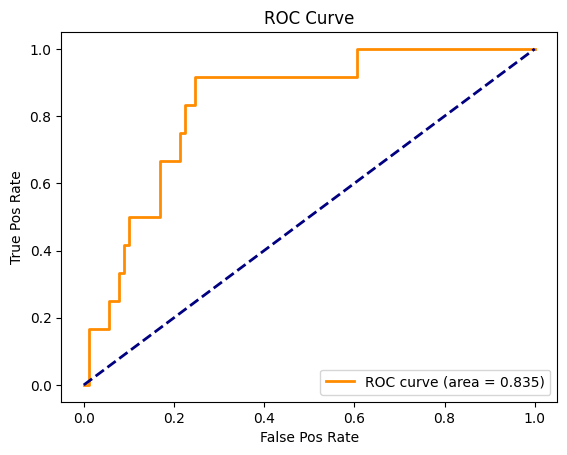

In [ ]:
plot_roc(fprs, tprs, auc)

With an AUC of 0.8352, this model performs well. Random classification would yield an AUC of 0.5, and a perfect model would yield an AUC of 1. Thus, our best model yields relatively good results.

In [ ]:
for thresh in np.arange(0, 1.01, .01):
    print(fpr_tpr_thresh(df_test['high_sales'], df_test['predictive_prob'], thresh))

   threshold  fpr  tpr
0        0.0  1.0  1.0
   threshold      fpr  tpr
0       0.01  0.94382  1.0
   threshold       fpr  tpr
0       0.02  0.831461  1.0
   threshold       fpr  tpr
0       0.03  0.764045  1.0
   threshold       fpr  tpr
0       0.04  0.674157  1.0
   threshold       fpr       tpr
0       0.05  0.550562  0.916667
   threshold       fpr       tpr
0       0.06  0.483146  0.916667
   threshold       fpr       tpr
0       0.07  0.449438  0.916667
   threshold       fpr       tpr
0       0.08  0.359551  0.916667
   threshold       fpr       tpr
0       0.09  0.337079  0.916667
   threshold       fpr       tpr
0        0.1  0.314607  0.916667
   threshold       fpr       tpr
0       0.11  0.280899  0.916667
   threshold       fpr       tpr
0       0.12  0.247191  0.833333
   threshold       fpr       tpr
0       0.13  0.247191  0.833333
   threshold       fpr       tpr
0       0.14  0.235955  0.833333
   threshold       fpr       tpr
0       0.15  0.235955  0.833333
   thr

In [ ]:
yhat = 1 * (df_test['predictive_prob'] >= 0.11)
yhat.head()

859    1
474    1
115    0
51     1
703    0
Name: predictive_prob, dtype: int64

An FPR of 0.280899 means that the model will incorrectly classify a game as having 'high sales' when it doesn't about 28% of the time, and a TPR of 0.91666 means that the model will correctly classify when a game will have high sales about 92% of the time.


## 8. Additional Analysis/Insight

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=100)

In [ ]:
kmeans.fit(df_train[['review_score', 'extras_length', 'publisher_EA', 'publisher_Nintendo', 'publisher_Sega', 'publisher_Ubisoft']])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=100)

In [ ]:
df_train['cluster'] = kmeans.labels_

In [ ]:
sil_score = silhouette_score(df_train[['review_score', 'extras_length', 'publisher_EA', 'publisher_Nintendo', 'publisher_Sega', 'publisher_Ubisoft']], df_train['cluster'])

print("Silhouette Score:", sil_score)

Silhouette Score: 0.31468086660873384



Because of the model's silhouette score of 0.315, it is apparent that clustering the dataset will provide a better analysis of predictive probability. This is because the silhouette score is above 0 and does show that the predictive KMeans model shows a correlation even though it may be relatively weak. However, we cannot say that this anaylisis is super useful as a 0.315 silhouette score is lower than our set threshold of 0.5. From this analysis we see that KMeans clustering will provide slightly further insight into the model and may have a slight benefit when it comes to overall predictive probability in the model. However, it is not super relevant or concrete as this value is relatively small.

## 9. Conclusion



Our primary research goal of the analysis was to build a predictive model that will perform the best when predicting whether or not a video game has high sales (1 million or more) in new datasets. Because our AUC and TPR were relatively high, this model can be considered trustworthy. The model has an FPR of 0.0280899, which means the predictor will classify a game as having high sales when it doesn't 28% of the time, and a TPR of 0.91666, which means it will correctly predict when a game will have high sales 92% of the time. Due to the model's high TPR and low FPR, this model would be adequate for predicting our primary research goal.


This model would be better than most other models due to the use of a backward selection algorithm to determine which model would yield the highest fit to our test dataset. However, there could have been more concrete ways of finding the exact model that would yield the highest AUC, one of which being LASSO regression to ensure that overfitting is not an impact and to locate a specific lambda value that would yield the highest AUC. Pursuing alternative methods to find the best model may have been relatively beneficial as it could have possibly led to us finding a model with a higher AUC. Including more explanatory variables from the original CSV may also yield a more concrete result in finding a higher AUC and create a model that would be better suited to our primary research goal. One other shortcoming is that our final dataset could've undergone more extensive cleaning to ensure that all data points do not skew the results in one way or another, and that our dataset could be more representative of more 'typical' data points. Also, our model could suffer from multicollinearity due to the presence of a relationship between our categorical explanatory variable and our numerical explanatory variables.

Based on our analysis, a future goal we could pursue would be to find a model that best predicts `review_score` based on all of the given explanatory variables in the dataset. In conclusion, because of the accuracy of our current model, we are confident in using it to predict whether a game would have high sales, and we believe that an investor could benefit from the use of our model when it comes to predicting whether or not a game will have high sales.

## References

(Clement, J. (n.d.). Topic: Video game industry. Statista. https://www.statista.com/topics/868/video-games/#topicOverview).

(The Comprehensive Guide to Investment Research. Corporate Finance Institute. (2024, January 9). https://corporatefinanceinstitute.com/resources/capital_markets/comprehensive-guide-to-investment-research/)

https://corgis-edu.github.io/corgis/csv/video_games/.
